In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("D:/Aplhabet Recognition/archive/A_Z Handwritten Data.csv")

In [29]:
data_div = data

In [30]:
data_div = [0 for i in range(26)]

In [31]:
grouped = data.groupby(data['0'])

In [32]:
for i in range(26) :
    data_div[i] = grouped.get_group(i)

In [33]:
type(data_div[1])

pandas.core.frame.DataFrame

In [34]:
data_div[8]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
81663,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81664,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81665,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81666,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81667,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82778,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82779,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82780,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82781,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y_div = [0 for i in range(26)] 
for i in range(26) :
    data_div[i] = data_div[i].sample(n = 75)
    y_div[i] = data_div[i]['0']
    del data_div[i]['0']

In [36]:
data_div[8]

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
82145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y_div[2]

23185    2
24955    2
37976    2
42797    2
23113    2
        ..
41172    2
43476    2
29706    2
25078    2
23536    2
Name: 0, Length: 75, dtype: int64

# So we are done with Image Input 
<br>
<h3> Now we have 75 images of image type </h3>
<br><br>

##### Now we have to perform Data Augmentation to increase image size to 300 for each type 

In [38]:
import random

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [182]:
def get_idg() :
    idg = ImageDataGenerator(
    rotation_range=random.randint(0,10),
    zoom_range = random.uniform(0,0.5), 
    fill_mode='constant', cval=255
    )
    
    return idg 

def get_idg_no() :
    idg = ImageDataGenerator(
    rotation_range= 0 
    )
    
    return idg 
    

In [228]:
%%time

image_data_aug  = [0 for i in range(26)] 
y_data_aug = [0 for i in range(26)] 

for i in range(26) :
    a ,ya = get_idg_no().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    b , yb = get_idg().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    #print(a.shape)
    a = a.reshape(75,28*28)
    b = b.reshape(75,28*28)
    a = pd.DataFrame(a)
    b = pd.DataFrame(b)
    ya = pd.DataFrame(ya)
    yb = pd.DataFrame(yb)
    #print(a)
    aug_2 = (a,b)
    y_data_aug[i] = [y_div[i] for j in range(2)]
    #print(aug_4_y)
    image_data_aug[i] =  pd.concat(aug_2, ignore_index = True)
    y_data_aug[i] = pd.concat(y_data_aug[i]  ,ignore_index = True)
    #print(y_data_aug[i])
    
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Wall time: 266 ms


In [229]:
type(image_data_aug[0])

pandas.core.frame.DataFrame

In [230]:
image_data_aug[0]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0
146,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,...,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
147,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0
148,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [233]:
y_data_aug[25]

0      25
1      25
2      25
3      25
4      25
       ..
145    25
146    25
147    25
148    25
149    25
Name: 0, Length: 150, dtype: int64

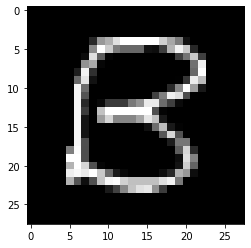

In [234]:
i_plot = image_data_aug[1].loc[1,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

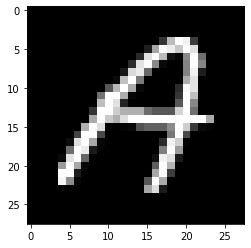

In [235]:
i_plot = image_data_aug[0].loc[0,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

### So done with Data_Augmenation 
<br>
<br>


<h4> In the code image_data_aug[i] represents all images of ith alphabet </h4> <br><br>
<h4> Similarly y_data_aug[i] represents the value for ith alphabet </h4>

In [236]:
image_data_aug[0]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0
146,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,...,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
147,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0
148,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


## Training and Test Data  

In [237]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [238]:
pd_data = [0 for i in range(26)]
y_data = [0 for i in range(26)]

for i in range(26) :
    pd_data[i] = image_data_aug[i]
    y_data[i]  = y_data_aug[i]

In [259]:
X = pd.concat(pd_data)
y = pd.concat(y_data)

In [260]:
X 

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
146,255.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,255.0
147,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
148,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [261]:
X = np.array(X)
y = np.array(y)

In [262]:
y

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, shuffle=True)

In [264]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 

In [265]:
X_train[0].shape

(784,)

In [266]:
# standard_scaler = MinMaxScaler()
# standard_scaler.fit(X_train)

# X_train = standard_scaler.transform(X_train)
# X_test = standard_scaler.transform(X_test)


X_train = X_train.reshape(-1,28,28,1)

X_test = X = X_test.reshape(-1,28,28,1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [267]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [268]:
def my_model(width,height,channel) :
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (width,height,channel)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(26, activation = "softmax"))
    
    
    return model
    
    

In [269]:
model = my_model(28,28,1)

In [270]:
%%time 

model.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])


Wall time: 6.97 ms


In [272]:
checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [273]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64, shuffle=True,callbacks=[cp_callback])

Epoch 1/25
49/49 [==============================] - 11s 200ms/step - loss: 3.3128 - accuracy: 0.1751 - val_loss: 2.6352 - val_accuracy: 0.1949

Epoch 00001: saving model to cp.ckpt
Epoch 2/25
49/49 [==============================] - 10s 194ms/step - loss: 1.2722 - accuracy: 0.6084 - val_loss: 1.5192 - val_accuracy: 0.6103

Epoch 00002: saving model to cp.ckpt
Epoch 3/25
49/49 [==============================] - 10s 194ms/step - loss: 0.7552 - accuracy: 0.7648 - val_loss: 0.7978 - val_accuracy: 0.8064

Epoch 00003: saving model to cp.ckpt
Epoch 4/25
49/49 [==============================] - 10s 206ms/step - loss: 0.5040 - accuracy: 0.8490 - val_loss: 0.4726 - val_accuracy: 0.8679

Epoch 00004: saving model to cp.ckpt
Epoch 5/25
49/49 [==============================] - 10s 202ms/step - loss: 0.3766 - accuracy: 0.8860 - val_loss: 0.3038 - val_accuracy: 0.9205

Epoch 00005: saving model to cp.ckpt
Epoch 6/25
49/49 [==============================] - 10s 203ms/step - loss: 0.3057 - accuracy: 0

In [221]:
len(X_test[0])

28

In [274]:
from numpy import unravel_index

In [278]:
def max_index(y_test) :
    ans = [0 for i in range(len(y_test))]
    for i in range(len(y_test)) :
        index = unravel_index(y_test[i].argmax(), y_test[i].shape)
        ans[i] = index[0] 
    return ans 

In [279]:

print(model.predict_classes(X_test))
print(max_index(y_test))

[ 9 12  2  8  3  6 14 17 24 16 25 19 19 22 14 14 12 16 12  5  2 17  4 16
  3  3 24 15 19  2  7  2 23  0 10  0 20 19  1 18 21  5  5  3  8 18 18  4
  8 24 18 15  1  8 21  8  0 18 19 18 25 17 25 15 23 20 24 22 12 16 13  7
 21  3 14 14  9 13  2 21 16 21  0  2  3  1 16  0  9  9  7 22 15  9  3  7
 20 12 12  6 23 12 18  6 11 10 11  6 15  5 13  2 11  0 22 16 16  3 13 22
 15 11  0  6 15 14  6 24 23 10  2  3 17 13  0  0 13 14 18  5  0  3  7  8
 25  4 24 23 23 20 23 22 15 22 12 10  3  5  6  9 24 20 11  4 19 12  1 18
 14 17 11 19 18 15 21  5  0  7 15 25 11 21 16 21 22 24 25 15 14 22  0 11
  8 19 12 17 21  7 22 17 18 11  2 14  2  9  8  1 22 14 22 17  0  6 21 17
 19  2 24 10 23  1 21 15  1 15 16  9 10 10 18  7  5  9  8 24 14 16 18 19
 12 25 18 10 11 19  7  2 19  2  3 20 23 20 19 25  6  3 25 21  5  4  8 23
  6  1 11  8  4 14  8 11 25 23  6 11 19 23 20 10 13 14  1  0  8  6 24 10
 18 12  9 16  3 18 22 13  4 12 10  1 18 24 21  5 22  1 16 14 19  7  9  6
 18  6  9  0  1 11 23  4 23  3 25  5 21  8  3 12 19

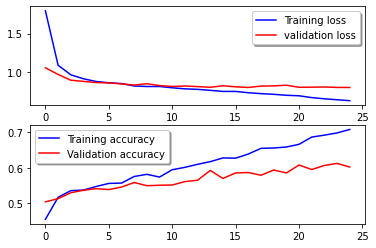

In [123]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [242]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Checking if pre trained saved is working correctly or not 

In [282]:
model2 = my_model(28,28,1)
model2.load_weights('cp.ckpt.index')

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


AssertionError: Some objects had attributes which were not restored:
    <tf.Variable 'conv2d_114/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
array([[[[-5.14483005e-02, -5.09646162e-02,  2.01726556e-02,
           7.85938650e-02,  3.67258340e-02, -7.30120391e-03,
          -5.93751147e-02,  7.33189285e-02, -8.31270590e-02,
          -3.88594344e-02,  3.89861465e-02,  1.62232667e-02,
          -6.72789067e-02, -7.12333396e-02, -3.41200717e-02,
           6.31483197e-02,  4.38336730e-02,  7.46641606e-02,
          -8.36632103e-02,  5.37628382e-02, -4.50131372e-02,
           2.38340348e-03, -5.71911484e-02, -1.40122622e-02,
          -3.33793201e-02,  7.01417178e-02,  5.02503514e-02,
           2.21611410e-02, -7.90058076e-03, -1.52141675e-02,
           5.55222481e-02, -2.85171717e-02]],

        [[-1.67478845e-02, -2.93735936e-02, -6.30529225e-02,
          -4.31816764e-02,  8.84154439e-03,  1.84094086e-02,
          -7.64121637e-02, -7.32967705e-02,  4.75377440e-02,
          -4.62013036e-02, -6.51193634e-02, -4.07987162e-02,
          -2.61693075e-02, -3.33856642e-02,  8.99508595e-05,
           4.15581316e-02,  7.23612159e-02,  7.55306333e-03,
          -6.76482022e-02, -1.72045901e-02, -6.42681047e-02,
           2.92497873e-03,  6.99493438e-02, -5.57070673e-02,
          -8.36358592e-02, -4.75126803e-02, -1.41796172e-02,
          -4.88877818e-02, -8.21464509e-02,  8.44985396e-02,
           6.94993436e-02,  5.51679283e-02]],

        [[ 6.76997751e-03,  1.82163268e-02, -6.91296458e-02,
          -3.90797965e-02, -1.78025216e-02,  3.28022987e-03,
          -5.26482202e-02, -7.56224319e-02,  8.05902332e-02,
          -7.35237598e-02,  8.31596553e-04,  5.22324145e-02,
          -3.41160037e-02, -2.97664106e-03,  9.39517468e-03,
          -3.05165388e-02,  8.24845731e-02,  5.36263287e-02,
           6.09951168e-02, -6.98284507e-02,  3.22947726e-02,
           7.79469311e-03, -5.61252013e-02,  2.67461166e-02,
           7.04264045e-02,  5.80172539e-02,  3.37229371e-02,
           7.27994442e-02,  3.80280018e-02, -6.62386417e-04,
           2.43976638e-02, -4.94443402e-02]],

        [[ 4.94262874e-02, -2.59392075e-02, -7.12682679e-02,
           5.91860265e-02,  7.99528509e-02, -6.97373599e-02,
           1.65382549e-02,  5.92710525e-02, -5.18307760e-02,
           7.09618032e-02,  7.42624998e-02, -6.47425056e-02,
          -1.34686530e-02, -4.05449681e-02, -1.62181035e-02,
          -8.22874904e-03,  5.15605211e-02,  1.91978961e-02,
          -8.27538595e-02,  2.23291069e-02, -7.14225471e-02,
           1.30284354e-02,  5.53124994e-02,  5.38352728e-02,
          -4.44851033e-02,  4.44162339e-02,  1.06921792e-03,
          -1.26556829e-02,  5.21764010e-02,  5.56270033e-03,
           2.45717168e-03, -4.56350856e-02]],

        [[-7.69578442e-02,  7.14776367e-02, -6.31289408e-02,
          -8.35320875e-02, -6.34422451e-02,  6.78313971e-02,
           4.53344285e-02, -1.02100596e-02, -6.93563074e-02,
          -2.75498591e-02,  3.55297774e-02,  8.39604288e-02,
          -7.61588439e-02,  5.95747679e-03,  5.80256879e-02,
           3.34110633e-02, -2.87995487e-02,  3.92788872e-02,
           6.50151670e-02, -8.26600865e-02,  1.52926743e-02,
          -5.40460311e-02, -2.78106332e-03,  6.46309257e-02,
          -3.56427059e-02, -7.84478411e-02,  1.69967338e-02,
           6.80284500e-02,  3.58877927e-02,  9.83889401e-03,
           4.42317426e-02,  3.61514837e-02]]],


       [[[-5.19356504e-02, -5.79366088e-03, -3.06328833e-02,
           5.90210855e-02,  1.16472170e-02, -1.07601956e-02,
          -6.21170402e-02, -1.77982748e-02, -8.25423449e-02,
          -6.54612556e-02, -2.31650956e-02,  3.84567678e-02,
          -3.18618752e-02, -7.05977231e-02, -6.90786913e-02,
          -7.82714412e-02, -2.62098722e-02,  3.04181501e-02,
          -5.22549897e-02,  5.11376858e-02, -1.07261762e-02,
           8.45154971e-02,  7.62859434e-02, -6.10446185e-03,
          -9.54426825e-04,  5.56863844e-03,  5.31065166e-02,
           3.66170928e-02,  6.53384626e-02,  4.05988842e-02,
           5.02419621e-02,  2.33724862e-02]],

        [[ 4.98488098e-02,  3.64903361e-03,  2.66331509e-02,
           4.67141122e-02, -4.99502905e-02,  1.80221573e-02,
          -6.75055385e-02, -1.90874338e-02, -6.09182417e-02,
          -3.02487016e-02,  1.73180625e-02,  7.86809325e-02,
          -6.30562752e-03,  1.36207193e-02,  4.15116698e-02,
           1.55274123e-02, -3.40723097e-02, -4.50498611e-03,
          -6.37702644e-02, -3.30978408e-02,  5.30916899e-02,
           6.31577075e-02, -3.69128510e-02, -5.05554453e-02,
          -2.46887021e-02, -2.89748609e-03, -2.89413258e-02,
          -1.26375854e-02, -3.80911119e-02, -6.40609413e-02,
          -2.64168344e-02, -4.76165190e-02]],

        [[ 3.13770249e-02, -3.91848944e-02, -8.34010392e-02,
          -6.69360608e-02,  7.36917108e-02,  7.12070614e-02,
           1.68437064e-02,  1.21146366e-02,  2.05407888e-02,
           5.39576858e-02,  3.48509401e-02, -7.42598325e-02,
          -1.48426369e-02,  1.29753500e-02, -4.52577360e-02,
          -7.17102364e-02, -2.65413933e-02,  1.63334236e-02,
           4.20787632e-02,  8.54030252e-03, -8.04318637e-02,
          -6.47110865e-02, -2.67023034e-02,  6.85000718e-02,
          -4.32888493e-02,  4.24836427e-02, -3.35543603e-03,
          -9.29804891e-03,  5.04013002e-02, -1.32977962e-02,
          -8.15028697e-02, -9.92459059e-03]],

        [[-2.67780200e-02,  3.68281230e-02, -6.02224693e-02,
          -3.28734927e-02, -3.49213295e-02, -1.93966255e-02,
          -1.82527006e-02,  3.07456851e-02, -3.62134762e-02,
          -1.32801682e-02, -7.43378922e-02,  4.78242934e-02,
          -3.74347009e-02, -3.73389348e-02, -1.35883689e-03,
           6.66925609e-02, -3.24662030e-03,  4.76544648e-02,
           2.11831927e-02, -2.57394016e-02,  3.57929841e-02,
          -5.46210110e-02, -8.11140314e-02,  6.16969913e-02,
          -5.29541001e-02,  2.44519934e-02, -3.59662138e-02,
           2.22078264e-02,  6.68109655e-02, -4.04674634e-02,
           8.40559602e-04,  5.59461713e-02]],

        [[-8.42168927e-04,  5.96341491e-03,  2.34083086e-03,
           2.83593535e-02,  2.97983736e-03, -6.10663742e-03,
           3.22834477e-02,  1.65871754e-02, -1.85287148e-02,
          -8.00915137e-02, -3.40600312e-03,  1.31545961e-02,
          -4.54472005e-03,  5.71999997e-02,  7.94627815e-02,
          -5.39776944e-02, -2.04629004e-02,  7.50243664e-04,
           6.39799088e-02,  6.71744347e-04,  7.67388642e-02,
           1.91841125e-02, -3.56938615e-02,  5.73180616e-02,
          -3.42374295e-02, -2.28424408e-02, -7.03058988e-02,
          -2.50717439e-02, -2.07634717e-02,  1.63123012e-02,
           1.65876001e-03, -6.97200000e-03]]],


       [[[ 7.08167106e-02, -4.15653102e-02, -7.04499334e-02,
           1.08586028e-02, -7.76553452e-02,  1.66892633e-02,
          -2.55586244e-02, -5.44908047e-02,  2.38228068e-02,
          -4.80652563e-02, -7.73183778e-02, -4.27093729e-02,
           5.44033051e-02, -5.16761877e-02,  1.35839954e-02,
          -2.96065956e-03,  4.14696634e-02, -7.54994825e-02,
          -3.70977111e-02,  1.53204650e-02,  1.24688670e-02,
           6.95328712e-02,  3.21613997e-03, -2.37783007e-02,
           3.92514840e-02, -4.81264144e-02,  5.61483204e-02,
          -2.73631476e-02, -7.92394876e-02,  2.09793821e-02,
           3.23177502e-02, -4.39836457e-02]],

        [[-7.25063086e-02, -8.43549147e-02,  4.01187390e-02,
           4.84688580e-02, -4.24608290e-02,  1.86926350e-02,
          -3.94862220e-02, -1.27617568e-02, -3.46452184e-02,
           5.78139275e-02, -7.85863474e-02,  1.85164735e-02,
           4.02261615e-02,  1.72825605e-02, -3.00131291e-02,
           2.94023007e-03, -3.68990004e-04, -8.01117495e-02,
          -1.11638308e-02,  2.67949179e-02,  9.90511477e-03,
           8.38044137e-02, -1.85889006e-03,  2.51948982e-02,
           1.25745684e-03,  4.01238650e-02,  1.64795369e-02,
          -1.13520250e-02, -1.53782740e-02,  7.42655545e-02,
           2.94291228e-03,  6.54212236e-02]],

        [[ 4.07826751e-02,  4.22167629e-02,  7.05054402e-02,
          -3.76420319e-02,  6.53587431e-02, -5.09557500e-02,
          -7.03775063e-02, -2.10969150e-03, -1.13606676e-02,
           2.80547142e-02, -7.23839477e-02,  1.72951818e-03,
           3.58502343e-02,  5.92166185e-02, -7.02653974e-02,
          -1.88585520e-02, -4.46446948e-02,  7.64969885e-02,
           2.98979878e-03,  6.39982820e-02, -5.42797893e-03,
          -7.13942647e-02,  5.48530817e-02,  2.97057256e-02,
           3.33500206e-02, -2.58450955e-03,  2.59884447e-03,
          -4.25752401e-02, -1.69291869e-02, -3.04224417e-02,
          -8.34372714e-02, -1.80972219e-02]],

        [[ 6.91497177e-02,  3.75580788e-02, -8.32781717e-02,
          -2.14714631e-02,  2.32067183e-02,  5.96312135e-02,
           6.72828108e-02,  3.17399576e-02,  7.50948638e-02,
          -8.08411092e-02, -4.26320098e-02,  7.95608461e-02,
           6.59239292e-03, -4.04824317e-03,  1.03071481e-02,
           3.99650633e-02,  7.70720094e-02, -1.56719908e-02,
          -4.49009016e-02, -1.95531473e-02,  4.65287119e-02,
          -6.13850951e-02, -6.48038238e-02, -1.47439241e-02,
           1.48249045e-02,  1.74490884e-02, -5.67066669e-02,
          -1.75460428e-03, -4.39291969e-02, -4.25253659e-02,
           4.03095186e-02,  1.55874491e-02]],

        [[ 8.05509239e-02, -3.29339616e-02, -6.21445104e-02,
          -3.46073397e-02, -2.49367580e-02,  8.49510282e-02,
           7.81956017e-02,  1.72890723e-03, -1.14329532e-02,
          -2.12855488e-02, -2.35341489e-02,  4.51733619e-02,
          -3.50398272e-02, -4.03717905e-03,  3.42795625e-02,
          -8.39426145e-02,  6.45890981e-02,  7.47614950e-02,
          -1.47046596e-02,  3.59004959e-02,  2.65332982e-02,
          -2.23290473e-02,  3.14059183e-02, -1.71203911e-02,
           5.48159182e-02,  4.65227365e-02, -7.16410205e-02,
           2.45064870e-02,  3.25034186e-02, -8.32620934e-02,
          -4.80079986e-02,  5.76639026e-02]]],


       [[[ 7.70103633e-02, -2.38308311e-03,  2.46418789e-02,
          -8.20644498e-02, -4.60724160e-02, -6.45603240e-02,
           7.53006339e-03,  3.62473875e-02,  5.33515960e-02,
           5.53974509e-02,  2.13695318e-03, -5.81137724e-02,
          -3.31136398e-02, -1.70647651e-02,  2.97719687e-02,
          -3.31601165e-02,  6.23286366e-02,  3.70657444e-03,
          -6.69322610e-02,  6.80418015e-02, -5.47790974e-02,
          -8.23242962e-03,  4.75444794e-02,  7.67481625e-02,
          -1.03140771e-02, -7.64542818e-03,  7.64319748e-02,
          -8.05685967e-02,  1.45463273e-02,  6.21394217e-02,
           5.94590008e-02,  8.42186958e-02]],

        [[-2.15172991e-02, -8.09834152e-02,  6.51657432e-02,
          -2.89698727e-02, -4.30320501e-02,  3.41561586e-02,
          -2.63939612e-02, -5.95750436e-02, -1.70316547e-03,
           4.45508361e-02,  6.54877722e-02,  1.26032680e-02,
           2.56539658e-02,  1.94653496e-02, -6.94301799e-02,
           7.18882680e-03,  5.47480285e-02,  3.41875926e-02,
          -5.22099957e-02,  6.83116466e-02,  1.15721449e-02,
           6.75344616e-02,  7.45189339e-02, -4.84893881e-02,
          -8.37121904e-02,  7.83386528e-02,  7.17304498e-02,
          -4.39944118e-03,  7.97368139e-02, -4.56971601e-02,
           1.81042179e-02, -2.48248279e-02]],

        [[-1.93358138e-02,  5.23116440e-02, -2.67364830e-02,
           8.62997025e-03,  2.20735520e-02,  6.86911643e-02,
           3.95361334e-02, -1.11933574e-02,  8.24351162e-02,
           1.17632896e-02,  3.30266133e-02, -8.37104395e-02,
          -6.92209154e-02,  9.80630517e-04,  4.35330719e-03,
          -2.49019079e-02, -5.20139188e-03,  2.33110413e-02,
          -7.84608573e-02, -2.24735662e-02, -7.22100288e-02,
           2.33903602e-02,  5.70264906e-02, -4.79246154e-02,
           6.37671798e-02, -2.93696895e-02,  4.20370698e-02,
           7.51633644e-02,  3.63559872e-02,  7.28204846e-03,
           1.46139786e-02, -6.13747239e-02]],

        [[ 5.50170839e-02,  2.60977373e-02, -3.22272070e-02,
           6.35971725e-02, -2.94441059e-02, -6.68592677e-02,
          -1.59639269e-02,  1.69506595e-02, -6.99899495e-02,
          -4.00409847e-03,  4.86414582e-02,  7.02627301e-02,
           5.43139875e-02, -5.58452681e-02, -1.97886378e-02,
          -2.25468054e-02,  5.79256117e-02,  4.24005687e-02,
          -3.75262573e-02, -8.29783529e-02, -9.47709382e-03,
           4.11262065e-02, -2.48581544e-02,  1.35859698e-02,
           2.46383622e-02,  6.62097931e-02,  2.40958109e-02,
           6.04675114e-02, -5.47211096e-02,  1.94521546e-02,
          -6.63882494e-02, -8.16585347e-02]],

        [[-7.21692964e-02, -4.82497290e-02, -1.13845393e-02,
          -5.40195405e-03,  1.02636367e-02, -2.32595168e-02,
           3.19817960e-02,  8.37199688e-02,  7.81929344e-02,
           5.00818640e-02, -6.01271912e-02, -7.89984688e-02,
           5.86514026e-02,  7.50228912e-02, -4.57147881e-02,
           2.97245309e-02,  2.71621570e-02, -2.67836303e-02,
          -1.97186917e-02, -3.08973640e-02, -3.15042660e-02,
           3.43058258e-03, -1.57626346e-02, -1.01739466e-02,
          -5.91270998e-02, -1.27623230e-02, -1.07187182e-02,
           3.04223374e-02, -8.31662416e-02,  8.15691501e-02,
          -1.16887316e-02, -7.88021758e-02]]],


       [[[ 3.78468186e-02,  2.60055289e-02,  6.77331388e-02,
          -2.69781724e-02,  7.56607056e-02, -6.53923079e-02,
           2.70674303e-02, -9.51802731e-03,  4.94771302e-02,
          -6.56722635e-02, -2.57047527e-02,  6.60489053e-02,
           1.02866739e-02,  6.52538985e-02,  6.01759404e-02,
           2.47062743e-03, -8.21836293e-04,  3.87634262e-02,
           7.41065294e-03, -7.94431567e-03, -7.31641054e-02,
           2.10043788e-03,  3.45099270e-02, -2.67503485e-02,
           4.08622622e-02, -5.35255410e-02,  6.95426613e-02,
          -7.54985511e-02,  3.64117175e-02,  1.60108134e-02,
           1.08646601e-02, -4.57864814e-02]],

        [[ 8.24451745e-02, -6.59886971e-02, -4.71873432e-02,
           1.42157078e-02, -8.01478997e-02,  4.07901853e-02,
           5.18690646e-02,  2.77418569e-02,  2.56453827e-02,
           3.49805206e-02, -4.38251160e-02,  8.16472918e-02,
          -2.08518803e-02, -8.46109390e-02, -6.42269701e-02,
          -8.41284096e-02,  1.16627887e-02, -3.73849459e-02,
          -6.10176250e-02, -7.14108199e-02, -7.79422373e-02,
           8.70229304e-03, -3.99920903e-02,  1.27683654e-02,
           7.32441992e-02, -8.22008178e-02, -2.71821767e-03,
           2.80757770e-02, -6.50995374e-02,  6.37632608e-03,
          -2.50077397e-02, -3.62034924e-02]],

        [[ 4.63374853e-02,  3.70459482e-02,  4.47778106e-02,
          -6.80370852e-02,  3.68895903e-02,  5.98122627e-02,
          -6.04536459e-02,  8.46938789e-02, -1.89360380e-02,
          -6.41082376e-02, -1.93697661e-02,  6.50997013e-02,
          -3.50221172e-02, -4.50141318e-02,  4.45175171e-02,
           6.06471747e-02, -3.38744558e-02,  2.58439109e-02,
           3.99917662e-02,  6.70125484e-02, -4.55719121e-02,
           6.94085807e-02, -7.83388019e-02, -5.83933219e-02,
           5.31747639e-02,  1.69842690e-02,  4.67295945e-02,
          -5.18412255e-02,  1.09351724e-02,  5.12499809e-02,
           6.32988364e-02,  8.32819194e-03]],

        [[ 2.70534232e-02,  2.80291513e-02,  1.71221048e-03,
           3.55504155e-02,  7.85848498e-02,  2.45471075e-02,
          -7.06288144e-02,  2.18944028e-02,  7.15783387e-02,
           6.70951009e-02, -5.75722381e-02,  7.74262697e-02,
          -3.21663506e-02,  2.85557434e-02, -5.27653322e-02,
           3.15729678e-02, -6.73605055e-02,  4.71258014e-02,
          -4.70406562e-03, -9.84051824e-03,  7.10418671e-02,
          -4.95103188e-02,  1.77704617e-02,  1.58598423e-02,
          -2.16057822e-02, -6.13741130e-02,  7.65690655e-02,
          -8.25137645e-03, -6.36689365e-04, -1.99301243e-02,
          -2.60162652e-02,  2.73930728e-02]],

        [[ 5.82411587e-02,  2.84197628e-02,  8.34772438e-02,
           6.68082386e-03, -1.87359005e-03,  2.99061835e-02,
           7.09632635e-02,  5.64216077e-02,  4.17516232e-02,
           8.25207978e-02, -4.87305112e-02, -1.94430649e-02,
          -1.22744069e-02,  6.71185255e-02,  7.48435855e-02,
          -1.15827844e-02,  5.71184456e-02,  2.43371353e-02,
           5.16017973e-02,  4.44789231e-02,  5.22666574e-02,
          -6.94158077e-02, -2.76609138e-02,  5.45022041e-02,
           7.22679496e-02,  2.92573571e-02, -3.59787792e-02,
          -2.49298252e-02, -6.37726635e-02,  7.47311115e-03,
           7.76798129e-02,  2.46423632e-02]]]], dtype=float32)>: ['conv2d_114/kernel']
    <tf.Variable 'conv2d_114/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_114/bias']
    <tf.Variable 'batch_normalization_129/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>: ['batch_normalization_129/gamma']
    <tf.Variable 'batch_normalization_129/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['batch_normalization_129/beta']
    <tf.Variable 'batch_normalization_129/moving_mean:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['batch_normalization_129/moving_mean']
    <tf.Variable 'batch_normalization_129/moving_variance:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>: ['batch_normalization_129/moving_variance']
    <tf.Variable 'conv2d_115/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[ 0.08894353, -0.05977122,  0.05894132, ..., -0.04162906,
           0.02519324, -0.09510606],
         [ 0.03003617,  0.03976461,  0.05913787, ...,  0.04029824,
          -0.00649183,  0.00264079],
         [-0.00435548, -0.06751756, -0.10098987, ...,  0.06662126,
          -0.08595265,  0.062951  ],
         ...,
         [-0.08272442,  0.05674174,  0.04043259, ...,  0.08818418,
           0.08564639, -0.0828737 ],
         [-0.09780145,  0.00107975,  0.03474534, ...,  0.05599388,
           0.0935244 ,  0.07212874],
         [ 0.07871538, -0.02359098,  0.09242372, ...,  0.05296732,
           0.05820541,  0.02591023]],

        [[-0.04237591,  0.10151696,  0.05251798, ..., -0.02696823,
          -0.00659166,  0.06681097],
         [-0.06719928, -0.05489751, -0.01801632, ..., -0.04680521,
           0.09253623,  0.06679554],
         [ 0.06629281,  0.09349979,  0.06026611, ...,  0.08937   ,
          -0.05042158,  0.00784368],
         ...,
         [ 0.08094649, -0.02040904,  0.04319829, ..., -0.05099342,
           0.07327187,  0.03586023],
         [-0.01352485, -0.06036359, -0.09180471, ..., -0.00549743,
          -0.02357962, -0.10205168],
         [-0.07485071, -0.08910556,  0.00868326, ...,  0.00876678,
          -0.10099641, -0.04902995]],

        [[ 0.03439131,  0.04943204, -0.0916671 , ..., -0.00508028,
           0.0555833 , -0.10143805],
         [ 0.09338669,  0.10032207,  0.0538581 , ..., -0.00236005,
           0.00637615,  0.0784574 ],
         [ 0.04138272, -0.04026536, -0.05924457, ...,  0.0671355 ,
           0.09607543, -0.03936634],
         ...,
         [-0.00871604, -0.03516168,  0.04433656, ..., -0.05127683,
          -0.02237319, -0.075156  ],
         [-0.09733602, -0.03928996, -0.09156368, ...,  0.01875317,
          -0.03495908, -0.05530023],
         [-0.04071162, -0.01651368,  0.02589984, ..., -0.03172555,
           0.0981721 , -0.00238522]]],


       [[[ 0.0620397 , -0.01395828,  0.04724044, ...,  0.00929736,
          -0.04187829,  0.07943258],
         [ 0.09680519, -0.03939717, -0.0457579 , ..., -0.02058422,
          -0.03641162, -0.06849881],
         [ 0.07510222,  0.06301501, -0.01792016, ..., -0.07129081,
          -0.06565954, -0.00864362],
         ...,
         [ 0.05879474, -0.07695948, -0.03712591, ..., -0.07289186,
          -0.03883222,  0.03090015],
         [-0.09596459,  0.04458947,  0.07616664, ..., -0.07194636,
          -0.07698016, -0.08578504],
         [-0.0346738 , -0.09395652, -0.09684777, ...,  0.07793161,
           0.01901412,  0.03697993]],

        [[-0.07912328,  0.06141171, -0.09213284, ...,  0.06304573,
           0.01559288, -0.02195154],
         [ 0.0148547 ,  0.08717996, -0.04478246, ...,  0.08632775,
           0.10205236, -0.07149363],
         [-0.04560793,  0.03222919,  0.09684677, ..., -0.01836649,
          -0.09414296, -0.02157916],
         ...,
         [ 0.06407459,  0.05868796, -0.04207882, ..., -0.08945329,
          -0.02850287,  0.08666797],
         [-0.0564331 ,  0.02840702,  0.05653425, ..., -0.06775163,
          -0.09597824,  0.07533146],
         [ 0.03162269,  0.05734962, -0.04673111, ..., -0.02168647,
          -0.09085219,  0.03113756]],

        [[ 0.03547588, -0.02106884,  0.03564803, ..., -0.03206116,
          -0.02762562, -0.06682092],
         [ 0.05365343, -0.08919559, -0.06454669, ...,  0.08827245,
          -0.04603099,  0.09574811],
         [-0.06542459, -0.04988228,  0.05780156, ..., -0.04713773,
           0.07599083, -0.04758558],
         ...,
         [ 0.09420523, -0.03136744,  0.02756457, ...,  0.0258453 ,
          -0.09475578,  0.04846892],
         [ 0.03974558,  0.00399264, -0.03045838, ..., -0.06767476,
          -0.03899238,  0.09514453],
         [-0.08320564, -0.05849544,  0.08917265, ...,  0.04358241,
          -0.06216218, -0.02731756]]],


       [[[ 0.05137509, -0.01093893, -0.01660357, ...,  0.08871579,
          -0.07828309,  0.06777547],
         [ 0.03767197, -0.06856626, -0.01336688, ...,  0.01829906,
           0.07840005,  0.02403153],
         [-0.01591724, -0.00534578,  0.00113757, ...,  0.04423308,
          -0.00991281, -0.06822645],
         ...,
         [ 0.07546867,  0.04941963,  0.02619034, ...,  0.10102426,
           0.06489037,  0.03450869],
         [ 0.0395615 , -0.04127698, -0.09556214, ..., -0.0048686 ,
           0.02355589,  0.0869129 ],
         [-0.03414661, -0.04860034,  0.06294554, ..., -0.090893  ,
           0.05675966, -0.01181561]],

        [[-0.06262171,  0.01091676,  0.0903264 , ..., -0.04323716,
           0.00634228,  0.03258082],
         [-0.06421553,  0.10183108, -0.08845873, ...,  0.07690609,
           0.07459472, -0.00943173],
         [-0.02010056, -0.078018  , -0.09281311, ...,  0.0975914 ,
          -0.0802223 , -0.01641832],
         ...,
         [-0.08029749, -0.05407443,  0.05013904, ..., -0.05646541,
          -0.04274823,  0.01729671],
         [-0.03296327, -0.09287234, -0.0129387 , ..., -0.04301468,
          -0.07404072, -0.01288386],
         [-0.0986732 ,  0.00915796, -0.03652263, ..., -0.05706514,
          -0.0150627 , -0.08883035]],

        [[ 0.03350657,  0.09461167,  0.01703417, ...,  0.06641054,
          -0.03846505, -0.08721709],
         [-0.01377843, -0.01191448,  0.07536598, ...,  0.09785073,
          -0.01292726,  0.08728831],
         [ 0.09276715, -0.01423037, -0.06214957, ...,  0.03962807,
           0.10047069, -0.04038662],
         ...,
         [-0.08180322, -0.02183474,  0.08713834, ...,  0.08776809,
           0.00130038,  0.04784954],
         [-0.03813103, -0.0397272 ,  0.02303384, ...,  0.0239353 ,
          -0.0607739 ,  0.09779748],
         [-0.01564303, -0.06503414,  0.01879495, ...,  0.00814204,
          -0.04783155, -0.08780671]]]], dtype=float32)>: ['conv2d_115/kernel']
    <tf.Variable 'conv2d_115/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_115/bias']
    <tf.Variable 'batch_normalization_130/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>: ['batch_normalization_130/gamma']
    <tf.Variable 'batch_normalization_130/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['batch_normalization_130/beta']
    <tf.Variable 'batch_normalization_130/moving_mean:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['batch_normalization_130/moving_mean']
    <tf.Variable 'batch_normalization_130/moving_variance:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>: ['batch_normalization_130/moving_variance']
    <tf.Variable 'conv2d_116/kernel:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[ 0.06786553, -0.0261334 ,  0.05468185, ...,  0.05123378,
           0.04701877, -0.04092249],
         [-0.00363847, -0.01574651, -0.04981294, ..., -0.04060807,
          -0.07870933, -0.01496635],
         [ 0.06977115, -0.06160953,  0.06276996, ..., -0.01680875,
           0.0556236 ,  0.00582371],
         ...,
         [ 0.053202  , -0.04889594,  0.04198524, ...,  0.01900645,
          -0.0331565 ,  0.01057426],
         [-0.0501347 , -0.03942879,  0.01960655, ...,  0.01956026,
          -0.05039076, -0.04256004],
         [-0.06611538, -0.06159077, -0.07272055, ..., -0.023371  ,
          -0.0026655 , -0.00966045]],

        [[ 0.06185357,  0.08331808, -0.00642395, ...,  0.06653073,
          -0.06299537,  0.00163712],
         [ 0.05239757, -0.0769107 ,  0.06467684, ..., -0.07825466,
          -0.03137428,  0.00842508],
         [ 0.07060862, -0.00917542, -0.00881752, ..., -0.04073662,
          -0.01588174, -0.01227534],
         ...,
         [-0.04347279,  0.05009105,  0.0205672 , ...,  0.06649119,
           0.0721819 ,  0.00302943],
         [-0.05579249,  0.06492988,  0.00272594, ...,  0.00871736,
          -0.01420721,  0.04369409],
         [ 0.05928604, -0.03155796, -0.0394375 , ..., -0.0519192 ,
           0.0780837 ,  0.0127368 ]],

        [[ 0.02232895, -0.03892915, -0.07620295, ..., -0.07362779,
           0.02034465,  0.04515404],
         [ 0.04273409, -0.00619683,  0.02169609, ...,  0.06995317,
           0.02664389,  0.04807133],
         [-0.04848013,  0.05660107,  0.0179223 , ..., -0.01286534,
          -0.043562  ,  0.00670568],
         ...,
         [ 0.0466852 ,  0.04046664, -0.03091624, ..., -0.03739556,
           0.04801627,  0.005681  ],
         [-0.03502915, -0.02775478,  0.06107005, ..., -0.02930908,
           0.04779597,  0.05749723],
         [ 0.04604412,  0.07484207,  0.04582614, ...,  0.01780865,
          -0.08090061, -0.07922006]]],


       [[[ 0.05491076, -0.00425478, -0.02198982, ...,  0.0025504 ,
           0.01308123, -0.02995614],
         [-0.03144783, -0.05735376, -0.03113335, ...,  0.01946803,
          -0.05290896, -0.02477866],
         [-0.0105044 ,  0.0075049 , -0.01178054, ..., -0.00464308,
           0.01379702, -0.03651337],
         ...,
         [-0.03535529,  0.03391626, -0.05554207, ..., -0.0733374 ,
           0.0512488 , -0.02560636],
         [ 0.07440766,  0.05216945, -0.07307305, ...,  0.01966017,
          -0.06616855, -0.00081893],
         [-0.03514791,  0.04141579,  0.04481114, ...,  0.06427529,
          -0.05128245, -0.04337732]],

        [[ 0.01960317,  0.08110889, -0.05065569, ...,  0.07411543,
          -0.02563556,  0.03024834],
         [ 0.077209  , -0.04263089, -0.06207162, ...,  0.02550242,
           0.07908883, -0.02494661],
         [-0.0137411 ,  0.02905273,  0.020271  , ...,  0.0148167 ,
          -0.0146755 , -0.05974553],
         ...,
         [ 0.07827396,  0.02542019, -0.04105077, ...,  0.07301182,
           0.08015092,  0.07740734],
         [ 0.03797013,  0.01828101,  0.06534401, ..., -0.01939579,
           0.04883713, -0.04024935],
         [-0.01840176,  0.04549287, -0.05745634, ..., -0.01360223,
          -0.06846356,  0.07146534]],

        [[-0.08174227, -0.04319054,  0.00514207, ..., -0.01205786,
          -0.03296026,  0.04976875],
         [ 0.05354258, -0.00556201,  0.0582151 , ..., -0.04334138,
           0.06577963,  0.02623764],
         [-0.04761519, -0.02017347, -0.00843507, ..., -0.03588595,
           0.01288992,  0.06692273],
         ...,
         [ 0.00411558,  0.04135039,  0.03604009, ..., -0.01093256,
           0.01114064,  0.00543308],
         [-0.03374019, -0.024954  ,  0.02764913, ...,  0.06904659,
           0.04201163,  0.01444662],
         [-0.06684017, -0.05146621,  0.06558526, ...,  0.07234574,
           0.07118727, -0.05247933]]],


       [[[ 0.02077695, -0.00187305,  0.03575812, ...,  0.02982893,
           0.05027277,  0.04850861],
         [ 0.03044951,  0.06913639, -0.03477621, ..., -0.07878844,
           0.00798943, -0.04601198],
         [ 0.06535903,  0.00629401, -0.00410497, ..., -0.05560794,
           0.0392978 , -0.00123346],
         ...,
         [-0.04378315,  0.06720487,  0.01940614, ..., -0.04239967,
          -0.05567314,  0.03575023],
         [ 0.04297205, -0.0456691 , -0.02656518, ...,  0.03513962,
          -0.00659426,  0.05752993],
         [-0.02449781, -0.07707467, -0.07209063, ...,  0.01041081,
          -0.04121944,  0.01540587]],

        [[ 0.00215662,  0.0820801 ,  0.01990247, ..., -0.06442132,
          -0.00513661, -0.04317605],
         [ 0.05494503, -0.02374178, -0.04593595, ...,  0.02747013,
           0.02792851, -0.06234119],
         [-0.02065265, -0.02749845, -0.07035393, ...,  0.03303631,
          -0.00575292, -0.041046  ],
         ...,
         [ 0.02054892,  0.02918879,  0.04967926, ..., -0.00331519,
           0.032446  , -0.00586434],
         [ 0.01392857,  0.04845939, -0.06637548, ...,  0.00743705,
          -0.01400916,  0.08319924],
         [-0.02172425, -0.01518768,  0.01606623, ..., -0.01281329,
          -0.05880431,  0.0314281 ]],

        [[ 0.05677726,  0.01288529, -0.08178856, ...,  0.0045661 ,
          -0.0011861 , -0.04291843],
         [-0.05863401, -0.07951623, -0.07241204, ...,  0.03616643,
           0.03830548, -0.07005432],
         [-0.03403916,  0.0271456 ,  0.01232588, ..., -0.02565426,
          -0.02148436, -0.07235152],
         ...,
         [-0.04798188, -0.01486143,  0.06022414, ...,  0.05292798,
          -0.0195879 , -0.05546286],
         [ 0.0536802 , -0.02341622, -0.05619989, ..., -0.02107247,
           0.01460256, -0.01807783],
         [ 0.02481482,  0.01606518, -0.05635709, ..., -0.0504626 ,
          -0.05637823, -0.05407457]]]], dtype=float32)>: ['conv2d_116/kernel']
    <tf.Variable 'conv2d_116/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_116/bias']
    <tf.Variable 'batch_normalization_131/gamma:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_131/gamma']
    <tf.Variable 'batch_normalization_131/beta:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_131/beta']
    <tf.Variable 'batch_normalization_131/moving_mean:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_131/moving_mean']
    <tf.Variable 'batch_normalization_131/moving_variance:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_131/moving_variance']
    <tf.Variable 'conv2d_117/kernel:0' shape=(3, 3, 64, 64) dtype=float32, numpy=
array([[[[ 0.04438304, -0.04285087,  0.01372197, ..., -0.00011134,
          -0.03350283,  0.033383  ],
         [-0.05145435,  0.0066842 ,  0.0524209 , ...,  0.0653877 ,
          -0.02055708,  0.04530247],
         [ 0.03368892,  0.02164079, -0.07096566, ..., -0.0069989 ,
          -0.04764551,  0.06185031],
         ...,
         [-0.04843613, -0.01151731, -0.03517066, ...,  0.06599356,
          -0.05435172, -0.00555785],
         [-0.0248896 , -0.04914992, -0.04809322, ..., -0.06303603,
           0.03960167,  0.02678834],
         [-0.01191647, -0.06993486,  0.04567583, ..., -0.02403647,
           0.00416996,  0.02237256]],

        [[-0.05666338, -0.06741683,  0.01532263, ...,  0.02284519,
          -0.06029843,  0.06942776],
         [-0.06540984,  0.05055628,  0.06774756, ..., -0.06818701,
          -0.04264463,  0.03898373],
         [ 0.05039816, -0.06217661, -0.0492875 , ..., -0.04672299,
           0.04685744, -0.01774649],
         ...,
         [ 0.06399538, -0.03546615, -0.02212004, ..., -0.02660194,
           0.05024142,  0.06244567],
         [ 0.05032002, -0.03508443, -0.01643254, ..., -0.00415868,
           0.06462857,  0.00122332],
         [ 0.02001463,  0.01953696, -0.03275201, ...,  0.03784043,
           0.03640389,  0.03026084]],

        [[-0.04184863, -0.0085455 , -0.02683187, ...,  0.05295728,
           0.06530787,  0.07112913],
         [ 0.03992489, -0.02688261, -0.06522462, ..., -0.04686223,
           0.04436062,  0.06112383],
         [-0.03357723, -0.00983307, -0.05401913, ..., -0.03685551,
          -0.00376391, -0.01079582],
         ...,
         [ 0.00457259, -0.07094861,  0.0460915 , ..., -0.05403766,
           0.03437745, -0.06845114],
         [-0.04561963,  0.01354801, -0.06585649, ...,  0.01189281,
           0.02888505, -0.02551439],
         [ 0.04832169, -0.04616661, -0.06813759, ..., -0.01463365,
           0.05538391,  0.02185833]]],


       [[[-0.04970164, -0.01272995,  0.04075366, ...,  0.03772872,
          -0.0674525 , -0.06899706],
         [-0.02783239, -0.00629096,  0.01843622, ...,  0.0132632 ,
           0.03179472,  0.02738975],
         [ 0.0435734 , -0.04655456, -0.05144501, ...,  0.03502637,
          -0.03955234,  0.04637276],
         ...,
         [ 0.0121603 ,  0.03119673, -0.03320348, ...,  0.0071391 ,
          -0.0612465 , -0.00995996],
         [-0.07110415,  0.05117569, -0.03385988, ..., -0.05418261,
          -0.0635227 ,  0.05754654],
         [-0.02510001, -0.00163276, -0.01566654, ..., -0.03747276,
          -0.00690898,  0.00663006]],

        [[ 0.06959999, -0.04133851,  0.05813232, ..., -0.06369941,
          -0.0332462 ,  0.00445484],
         [ 0.02912505, -0.06469519,  0.04489003, ..., -0.00385603,
           0.02932602, -0.00194353],
         [ 0.05678529,  0.07034063,  0.0484549 , ..., -0.03730074,
          -0.05990511, -0.03386389],
         ...,
         [ 0.06124784, -0.00156062,  0.05893785, ..., -0.03772413,
          -0.0540878 , -0.02331681],
         [ 0.06264238,  0.02784982,  0.0576838 , ..., -0.04768804,
           0.04428057,  0.04030138],
         [-0.01988168,  0.0681812 , -0.06251813, ..., -0.0713319 ,
           0.07074553,  0.03368422]],

        [[ 0.07071967,  0.05504942,  0.02465089, ...,  0.06811538,
           0.03719527,  0.03165621],
         [-0.04879937,  0.06996217,  0.06860951, ...,  0.03760716,
           0.05242384,  0.00094993],
         [ 0.05609709, -0.06910016, -0.00144058, ..., -0.05156258,
          -0.03266622,  0.00507005],
         ...,
         [-0.03941873, -0.01882354,  0.06653954, ..., -0.02171435,
          -0.03149492,  0.04557445],
         [-0.02137103,  0.00311795, -0.04449124, ..., -0.05712911,
          -0.01872971,  0.00584043],
         [-0.05034996,  0.02177434, -0.0224377 , ...,  0.01662668,
          -0.02704531, -0.04708452]]],


       [[[ 0.05569963, -0.03258986, -0.00135416, ...,  0.04769374,
           0.06976673,  0.01427959],
         [ 0.0194154 , -0.05084968, -0.02335573, ..., -0.03606197,
           0.02512049,  0.03126741],
         [ 0.04725768,  0.0075729 , -0.01658427, ..., -0.02292686,
           0.0249723 , -0.04305361],
         ...,
         [ 0.02627002, -0.01923196,  0.04843508, ...,  0.04033419,
          -0.01041249, -0.04651652],
         [-0.0032336 , -0.05547963,  0.04287176, ..., -0.04120681,
           0.06320404,  0.06568711],
         [ 0.01238833,  0.06561546,  0.04218252, ..., -0.05353834,
          -0.07088326,  0.06038113]],

        [[ 0.0588329 , -0.06585014,  0.00516375, ...,  0.0631793 ,
          -0.04019496, -0.00482945],
         [-0.06247793, -0.05692145,  0.05196715, ..., -0.05612189,
          -0.01730888,  0.01347722],
         [ 0.03445052, -0.02037941,  0.05801201, ..., -0.00157129,
           0.01940921, -0.02310072],
         ...,
         [ 0.02310533,  0.03313166,  0.03858825, ...,  0.05428907,
          -0.01432565,  0.01131889],
         [-0.06108302,  0.06623052, -0.05047789, ..., -0.03463778,
          -0.02358206,  0.03197179],
         [ 0.06087202, -0.06729334, -0.03871019, ...,  0.01125055,
          -0.03692764,  0.02934371]],

        [[ 0.02823823, -0.05539232, -0.03197594, ..., -0.0659197 ,
          -0.00187466,  0.03192572],
         [ 0.01177758,  0.05835094, -0.04251462, ..., -0.00739201,
          -0.00145199, -0.06548118],
         [ 0.0012126 ,  0.0084261 ,  0.01720739, ..., -0.00425037,
          -0.04573406,  0.05145468],
         ...,
         [-0.03969051, -0.0525812 , -0.02062179, ..., -0.05824813,
           0.06520851,  0.03068282],
         [-0.03640494,  0.01628947, -0.07133237, ..., -0.02125225,
          -0.06235721, -0.00847837],
         [ 0.02021034,  0.07002898, -0.02424689, ..., -0.04233089,
          -0.00221475,  0.06101018]]]], dtype=float32)>: ['conv2d_117/kernel']
    <tf.Variable 'conv2d_117/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_117/bias']
    <tf.Variable 'batch_normalization_132/gamma:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_132/gamma']
    <tf.Variable 'batch_normalization_132/beta:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_132/beta']
    <tf.Variable 'batch_normalization_132/moving_mean:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_132/moving_mean']
    <tf.Variable 'batch_normalization_132/moving_variance:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_132/moving_variance']
    <tf.Variable 'conv2d_118/kernel:0' shape=(3, 3, 64, 64) dtype=float32, numpy=
array([[[[ 0.03877113,  0.01833312,  0.01893025, ..., -0.05776759,
          -0.06151442, -0.03601512],
         [-0.05116709,  0.05850439,  0.01984343, ..., -0.01334621,
           0.02125169, -0.0350797 ],
         [-0.00070491, -0.03257178,  0.06816809, ..., -0.03471268,
          -0.04834292,  0.05908708],
         ...,
         [ 0.04942653,  0.06266218, -0.0021069 , ..., -0.00438359,
          -0.06648469,  0.04549726],
         [-0.03526551,  0.03443979, -0.04499265, ..., -0.06243909,
          -0.05706972,  0.06691751],
         [-0.06174187,  0.03836393, -0.03227536, ..., -0.00280215,
           0.02770991,  0.05923393]],

        [[ 0.04542252,  0.00117584, -0.01835831, ..., -0.05846206,
           0.01748011,  0.00476333],
         [ 0.02568193,  0.07112138,  0.01883388, ..., -0.01682904,
           0.07093517,  0.02567424],
         [ 0.0214892 ,  0.06370644,  0.06460989, ..., -0.06226235,
           0.06367651, -0.04267108],
         ...,
         [-0.01231925, -0.03878116, -0.01435659, ..., -0.04112145,
           0.02065908, -0.05534385],
         [-0.01011064, -0.06449308,  0.04553054, ..., -0.06459568,
          -0.00621687, -0.04857603],
         [-0.0565642 , -0.06821758, -0.03413916, ...,  0.05004583,
           0.03125704, -0.05878351]],

        [[-0.04761552, -0.06600253, -0.0518624 , ..., -0.01935761,
          -0.0241734 , -0.02307914],
         [-0.05798317,  0.0470167 , -0.05382694, ..., -0.02734956,
           0.03134477,  0.02986907],
         [ 0.04247741, -0.0155019 , -0.03319821, ..., -0.00305159,
           0.06144111, -0.05329078],
         ...,
         [ 0.04071425, -0.06901441,  0.05070599, ..., -0.06647912,
          -0.02296019,  0.04623763],
         [-0.0565888 , -0.05815906,  0.00165781, ..., -0.06593505,
           0.00515372, -0.06898157],
         [ 0.01733115,  0.07154359, -0.03129489, ..., -0.02506095,
           0.02996183, -0.04260403]]],


       [[[-0.04516261,  0.0463337 , -0.04536558, ...,  0.06501704,
           0.00568268, -0.05899135],
         [ 0.04214638,  0.00988057,  0.00089636, ..., -0.07072169,
          -0.04104153,  0.02192716],
         [-0.01770686, -0.05478507, -0.05104627, ...,  0.05898683,
          -0.06822073, -0.03223513],
         ...,
         [ 0.06841086,  0.03417531,  0.0299482 , ..., -0.01076939,
           0.03749533,  0.00398302],
         [-0.03629133,  0.02187862, -0.0258222 , ...,  0.05863181,
          -0.05516243, -0.01502142],
         [-0.02733949, -0.05090197, -0.01433316, ...,  0.05674313,
          -0.04189938,  0.01198992]],

        [[ 0.03188954, -0.07039972,  0.05304247, ..., -0.0655705 ,
          -0.0065212 , -0.06953745],
         [-0.04539733, -0.00151605, -0.0518778 , ...,  0.07069567,
           0.02648086,  0.0553602 ],
         [ 0.0621936 ,  0.03769825,  0.03377232, ...,  0.05826665,
          -0.06291612, -0.00311076],
         ...,
         [-0.00730772,  0.04134034,  0.00104246, ..., -0.02777834,
           0.04989239,  0.04253239],
         [-0.03053559, -0.0093063 ,  0.06875573, ...,  0.06139988,
           0.0020249 , -0.05570515],
         [ 0.06723271, -0.03812815,  0.00459572, ..., -0.05536314,
          -0.03794863, -0.02327976]],

        [[-0.04645947,  0.03012734,  0.0161233 , ..., -0.05706478,
          -0.04067849, -0.01412322],
         [-0.04957503, -0.02838425, -0.01845252, ..., -0.05008958,
          -0.06112057, -0.00776485],
         [-0.00217076, -0.03719087,  0.04201579, ...,  0.06649381,
          -0.05802302, -0.04026086],
         ...,
         [ 0.03809988, -0.01834358, -0.00597712, ..., -0.03900846,
           0.05055071,  0.03343792],
         [ 0.00275002,  0.00485256,  0.05018485, ..., -0.06025784,
           0.04186558,  0.03521121],
         [ 0.0118692 ,  0.02633362,  0.05148832, ..., -0.06171424,
          -0.06679129, -0.06939138]]],


       [[[-0.0040705 , -0.06354765,  0.01615597, ...,  0.06927787,
           0.05164745, -0.01483686],
         [ 0.07025413,  0.05731997, -0.00689374, ...,  0.02061816,
          -0.07158032, -0.058349  ],
         [ 0.05394121, -0.0252414 , -0.01950267, ..., -0.04081823,
          -0.01345436,  0.018637  ],
         ...,
         [-0.06631189, -0.00459479,  0.0194456 , ...,  0.00292176,
           0.01898488,  0.01096507],
         [ 0.05909352,  0.05787852, -0.04479546, ..., -0.07010835,
          -0.00232496,  0.04265188],
         [-0.01702597,  0.02992214,  0.01510631, ...,  0.04920357,
          -0.01130041, -0.06844547]],

        [[-0.06974315, -0.05750525,  0.05637971, ...,  0.04629767,
          -0.01945687,  0.06011067],
         [-0.00213712,  0.00575739, -0.06786154, ...,  0.01156081,
          -0.00796626,  0.03657601],
         [ 0.00955804,  0.00554314,  0.03028002, ..., -0.06273021,
           0.03617402, -0.00306208],
         ...,
         [-0.00913791,  0.05858643, -0.0342128 , ..., -0.02685412,
          -0.00211862,  0.05895548],
         [-0.04518333, -0.02263317, -0.061915  , ..., -0.03589646,
          -0.04154506, -0.04066733],
         [-0.05078237,  0.03219026, -0.01999066, ...,  0.00875963,
          -0.04741736, -0.05800588]],

        [[-0.03001233, -0.01149807, -0.01185129, ..., -0.06561344,
           0.00220028, -0.0018803 ],
         [ 0.04597792,  0.00784519, -0.01591411, ..., -0.00528041,
           0.04508949,  0.01272945],
         [-0.03790894,  0.03259083, -0.0264221 , ..., -0.05438966,
           0.00305047,  0.00836204],
         ...,
         [-0.03962624,  0.05532111,  0.00554682, ...,  0.01193276,
           0.03864805,  0.0569544 ],
         [ 0.03286623,  0.03293015,  0.04660929, ...,  0.03876019,
          -0.04701607, -0.04473887],
         [ 0.03670609, -0.03495495,  0.02037287, ..., -0.05017339,
          -0.0045495 , -0.00400575]]]], dtype=float32)>: ['conv2d_118/kernel']
    <tf.Variable 'conv2d_118/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_118/bias']
    <tf.Variable 'batch_normalization_133/gamma:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_133/gamma']
    <tf.Variable 'batch_normalization_133/beta:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_133/beta']
    <tf.Variable 'batch_normalization_133/moving_mean:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_133/moving_mean']
    <tf.Variable 'batch_normalization_133/moving_variance:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_133/moving_variance']
    <tf.Variable 'conv2d_119/kernel:0' shape=(3, 3, 64, 128) dtype=float32, numpy=
array([[[[ 5.92639670e-03,  3.67051177e-02, -3.15407291e-03, ...,
          -1.11163780e-03,  4.50912006e-02, -9.13154334e-04],
         [-4.50183973e-02,  3.69103439e-02, -4.35523614e-02, ...,
           2.20872276e-02, -8.50735605e-03,  6.83987513e-03],
         [ 2.07550824e-03,  2.06881873e-02, -7.99454749e-04, ...,
           1.69167928e-02,  4.24238667e-03,  3.15575786e-02],
         ...,
         [-4.20955569e-03,  1.03060119e-02, -3.34499329e-02, ...,
           3.75226401e-02,  2.95442343e-03,  9.13659111e-03],
         [ 5.06296642e-02,  6.05051592e-03, -1.44848451e-02, ...,
          -4.75230999e-02,  7.66558573e-03, -4.68068868e-02],
         [-2.62558460e-05,  2.77219601e-02,  5.84110953e-02, ...,
           5.63734062e-02,  5.09757437e-02,  4.89783473e-02]],

        [[-1.58014558e-02, -5.27883396e-02, -4.35903780e-02, ...,
           1.11281760e-02,  5.47892340e-02,  1.55311115e-02],
         [ 6.07189909e-03, -1.85826868e-02,  2.27298550e-02, ...,
          -3.09677627e-02, -4.90207039e-02, -9.70738754e-03],
         [-1.71526857e-02,  2.70762667e-03,  4.96365540e-02, ...,
           3.61494906e-02,  1.86730362e-02, -5.29034138e-02],
         ...,
         [ 2.29848139e-02,  3.51279639e-02,  3.34672369e-02, ...,
           1.85861103e-02, -2.05486268e-02, -5.01186401e-03],
         [-5.45427725e-02,  4.56480049e-02,  4.66168486e-02, ...,
           3.24751027e-02,  1.22028776e-02, -8.99219885e-03],
         [ 1.51127614e-02,  5.80065139e-02, -3.74097116e-02, ...,
          -2.66156644e-02, -2.65194289e-02,  6.47733733e-03]],

        [[ 5.05826510e-02,  1.32703967e-02,  4.88886870e-02, ...,
           1.63400136e-02, -2.91801747e-02,  1.37164108e-02],
         [ 4.86677103e-02,  2.19557434e-04,  5.58342896e-02, ...,
          -2.69679688e-02,  4.29415964e-02,  4.83439490e-03],
         [ 2.55890377e-02, -5.10364920e-02,  2.58725509e-03, ...,
           1.68920495e-02,  2.78913118e-02, -5.74136302e-02],
         ...,
         [ 2.68697366e-03,  3.38242762e-02,  1.18476935e-02, ...,
           5.05354889e-02,  9.12024453e-03,  3.82690690e-02],
         [-3.41674685e-02, -2.05314308e-02,  1.84942745e-02, ...,
          -2.25872844e-02, -5.58495335e-02,  3.38141806e-02],
         [ 7.25823268e-03, -2.69127153e-02, -8.69541615e-03, ...,
           2.81900205e-02, -2.23457813e-02,  1.59018375e-02]]],


       [[[ 2.32915953e-03,  2.94929035e-02,  3.72573622e-02, ...,
           5.55808060e-02, -2.74109095e-03, -5.54106012e-02],
         [ 4.68080081e-02,  2.01425292e-02,  4.59944643e-02, ...,
          -5.16686663e-02, -3.53650004e-02,  3.48044597e-02],
         [ 4.30017300e-02, -4.46912386e-02,  9.46910307e-03, ...,
          -5.29691465e-02, -2.65936516e-02, -5.22887856e-02],
         ...,
         [ 4.96440418e-02,  5.63724674e-02, -1.36712417e-02, ...,
           1.03393681e-02, -6.24717399e-03, -1.06401816e-02],
         [ 3.34173627e-02, -2.57701986e-02, -2.08226591e-03, ...,
          -3.81672308e-02,  3.72742377e-02,  5.84307052e-02],
         [-3.05254310e-02, -1.41575336e-02,  4.63289432e-02, ...,
           3.11797075e-02,  1.77289434e-02,  4.10461016e-02]],

        [[-5.10600358e-02,  5.42509072e-02, -6.89703971e-04, ...,
          -3.79039682e-02,  4.29699905e-02, -4.30909805e-02],
         [-1.99785493e-02,  3.52671631e-02, -5.61943352e-02, ...,
          -4.01885808e-02,  5.51172718e-03,  2.66741626e-02],
         [-7.04827532e-03,  5.85093908e-02,  4.21230905e-02, ...,
          -2.34619565e-02, -5.77718094e-02, -1.34788863e-02],
         ...,
         [-2.54554451e-02, -3.55947986e-02, -2.30057724e-02, ...,
           5.14299758e-02, -1.77750550e-02, -5.36220446e-02],
         [ 2.16647200e-02, -5.85373491e-02,  4.51355241e-02, ...,
          -3.84649709e-02, -3.69175486e-02,  3.43742706e-02],
         [-3.27188820e-02,  2.53531672e-02,  2.20822506e-02, ...,
           5.07080369e-02, -2.83188745e-03, -1.01960115e-02]],

        [[ 2.54969187e-02, -2.61611827e-02, -3.48166674e-02, ...,
          -2.54312530e-02,  5.35753742e-03, -5.37595563e-02],
         [-4.86933775e-02,  3.71298455e-02, -3.68448570e-02, ...,
           9.54554603e-03, -7.39664584e-03,  1.31798498e-02],
         [-3.83893475e-02, -5.46623841e-02, -4.05137986e-02, ...,
          -5.30320741e-02,  1.22077055e-02,  4.72660176e-02],
         ...,
         [ 1.29704960e-02,  4.89976518e-02, -5.29685430e-02, ...,
           7.35074654e-03, -2.63867527e-03,  8.54104385e-03],
         [ 1.50210224e-02, -2.04025321e-02, -5.77369109e-02, ...,
          -2.10241675e-02, -4.34633046e-02,  2.73389779e-02],
         [-1.78920813e-02, -2.34989896e-02,  8.72182474e-03, ...,
          -3.17422822e-02, -2.78989654e-02,  5.10256849e-02]]],


       [[[ 5.16392477e-02,  5.61533310e-02,  9.08097252e-03, ...,
           3.08794193e-02,  3.93535532e-02,  2.49830373e-02],
         [ 2.79930644e-02, -4.14737687e-03, -1.11454092e-02, ...,
           5.03407307e-02,  4.47459519e-04,  5.27900942e-02],
         [ 3.52340564e-03, -7.22824037e-03,  2.77921930e-03, ...,
          -4.80273589e-02, -5.18609397e-02, -2.40061283e-02],
         ...,
         [-2.89626047e-03,  4.55319025e-02,  4.90672477e-02, ...,
          -5.69268353e-02, -5.39752766e-02,  5.38167246e-02],
         [-2.30558030e-02,  3.07509862e-02,  4.74419408e-02, ...,
          -4.16974649e-02, -2.29245052e-03,  1.77171864e-02],
         [ 2.91716047e-02, -3.01435813e-02,  2.47952156e-02, ...,
           2.62738951e-02,  1.46752112e-02, -3.56252976e-02]],

        [[-1.55641846e-02, -2.96125300e-02,  1.23685263e-02, ...,
          -5.72897904e-02,  5.09961434e-02,  5.38648926e-02],
         [ 3.18529569e-02,  1.37805454e-02, -5.22247329e-03, ...,
           4.17382084e-02, -3.17032672e-02, -9.25127417e-03],
         [ 3.49958055e-02, -5.74504249e-02,  8.70924070e-03, ...,
           4.63348962e-02, -1.20525807e-02,  5.52913807e-02],
         ...,
         [ 6.64596632e-03,  1.68264993e-02,  3.08705010e-02, ...,
          -2.55147889e-02, -5.43857738e-02, -1.58110671e-02],
         [-1.64798275e-03,  3.11265327e-02,  3.31513323e-02, ...,
          -2.87190080e-04,  3.46353538e-02, -7.44935870e-03],
         [-4.88969311e-03, -1.58995464e-02, -2.78077181e-02, ...,
          -1.58512741e-02,  2.64122896e-02,  3.70878763e-02]],

        [[ 5.39955869e-03,  5.30493669e-02, -4.24428172e-02, ...,
          -1.84869990e-02,  3.90446968e-02,  3.97465415e-02],
         [-4.13938090e-02,  2.99666934e-02, -5.67562245e-02, ...,
          -8.98604468e-03,  2.97341831e-02,  1.71240084e-02],
         [-2.29456425e-02, -2.82913670e-02,  4.04812060e-02, ...,
           2.04350837e-02,  5.27900942e-02,  2.19430663e-02],
         ...,
         [-1.20399520e-03,  2.91409902e-02,  3.82960625e-02, ...,
          -1.47794262e-02,  2.14670785e-02, -2.18186229e-02],
         [ 3.92224230e-02, -4.78372350e-02,  4.43377718e-03, ...,
           4.08553444e-02, -3.97521928e-02,  4.30302210e-02],
         [ 5.45667671e-02, -2.98143439e-02,  4.19466384e-02, ...,
          -5.21018058e-02,  4.69476990e-02, -2.58032978e-02]]]],
      dtype=float32)>: ['conv2d_119/kernel']
    <tf.Variable 'conv2d_119/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_119/bias']
    <tf.Variable 'batch_normalization_134/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_134/gamma']
    <tf.Variable 'batch_normalization_134/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_134/beta']
    <tf.Variable 'batch_normalization_134/moving_mean:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_134/moving_mean']
    <tf.Variable 'batch_normalization_134/moving_variance:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_134/moving_variance']
    <tf.Variable 'conv2d_120/kernel:0' shape=(3, 3, 128, 128) dtype=float32, numpy=
array([[[[ 4.93689999e-02,  9.58705693e-03,  4.25749421e-02, ...,
           3.30835804e-02, -2.95136832e-02, -3.75214592e-02],
         [-3.58970277e-02,  2.49863043e-02, -4.61151861e-02, ...,
          -2.90487669e-02, -2.40574311e-02, -2.79105920e-02],
         [ 4.20482159e-02,  3.01028565e-02,  2.46394128e-02, ...,
          -4.49959897e-02,  1.32843852e-02,  4.52577695e-02],
         ...,
         [ 3.18974257e-04, -3.88700329e-02,  3.98853868e-02, ...,
           7.24281743e-03,  3.16824913e-02, -2.71189753e-02],
         [-2.23529916e-02, -7.32007623e-03, -4.96918336e-02, ...,
           1.08009204e-02,  1.51445121e-02, -4.40491624e-02],
         [-4.56182696e-02,  1.54934675e-02,  2.23518386e-02, ...,
           4.82646376e-02,  2.31531113e-02, -4.55476716e-03]],

        [[-4.38416824e-02, -9.82550159e-03,  4.86429855e-02, ...,
           2.38651335e-02, -3.89891192e-02,  2.98683196e-02],
         [-2.24120170e-03, -4.72485907e-02, -4.87625599e-02, ...,
           4.59216833e-02,  1.60954967e-02,  1.05360150e-02],
         [ 1.85889751e-03,  7.11571425e-04,  4.36385795e-02, ...,
           4.85280305e-02,  3.53305712e-02,  9.72882286e-03],
         ...,
         [ 9.25891846e-03,  2.97392085e-02,  4.97144535e-02, ...,
           1.90239772e-02,  1.78387761e-03,  1.01246685e-03],
         [-1.95267797e-03, -1.62639990e-02,  3.62802669e-03, ...,
          -2.50708610e-02, -1.51998438e-02,  1.76016241e-03],
         [-4.98890132e-03, -2.12633386e-02, -1.01318695e-02, ...,
          -2.78186835e-02, -6.25446439e-03,  9.86419618e-04]],

        [[ 1.12398379e-02, -2.65389010e-02, -3.77460942e-02, ...,
          -2.19314378e-02, -4.59022447e-02,  7.18642026e-04],
         [ 3.50316465e-02,  4.11315411e-02, -3.09306215e-02, ...,
           1.39028579e-02,  4.45092320e-02,  9.12372023e-04],
         [-4.39234190e-02, -2.98041645e-02,  3.71468291e-02, ...,
          -2.29838379e-02,  3.17297801e-02,  8.14467669e-03],
         ...,
         [-4.49046791e-02,  3.12201455e-02,  2.32214183e-02, ...,
          -3.26759890e-02, -8.52194428e-03, -2.56756581e-02],
         [ 2.93649957e-02, -4.58571762e-02,  2.63534039e-02, ...,
           2.88554132e-02, -3.29503268e-02,  4.29437980e-02],
         [ 2.12391838e-02,  2.14958340e-02, -2.33347509e-02, ...,
           2.44273990e-02, -4.46736068e-03,  1.46632269e-03]]],


       [[[-3.78015973e-02,  2.49770805e-02,  3.30687314e-03, ...,
          -3.56002524e-03,  2.36704946e-02,  3.55348140e-02],
         [-3.95305157e-02,  1.58600956e-02,  3.73867452e-02, ...,
           5.20486012e-03, -3.64764929e-02, -1.48677155e-02],
         [ 3.40450928e-02, -4.67161387e-02, -2.84752864e-02, ...,
           1.30275786e-02,  3.03959325e-02, -2.61642020e-02],
         ...,
         [-6.10230491e-03, -2.25794148e-02, -3.66666839e-02, ...,
          -5.08478917e-02,  5.09331599e-02, -1.99583694e-02],
         [ 4.97555509e-02,  2.59329379e-02, -9.17588174e-03, ...,
          -1.17883086e-04,  4.51394096e-02, -1.10434666e-02],
         [ 2.85531655e-02,  1.90091655e-02,  2.63330787e-02, ...,
           2.64201686e-02, -1.40645653e-02,  2.44300738e-02]],

        [[-2.90244333e-02, -4.46649455e-02, -1.38321146e-03, ...,
           2.27538049e-02,  4.43653166e-02, -2.98210513e-02],
         [ 1.35339946e-02,  1.60827488e-02,  4.07807529e-03, ...,
          -1.65734477e-02,  4.17180732e-03,  1.26213804e-02],
         [-1.13680474e-02,  1.07784234e-02,  4.26524431e-02, ...,
          -2.97750905e-03,  4.08553556e-02, -8.91075656e-03],
         ...,
         [-4.65830192e-02,  4.95095253e-02,  9.83839855e-03, ...,
          -2.24753041e-02,  6.30866364e-03, -3.80909219e-02],
         [ 4.10273224e-02, -5.23339212e-03,  2.23615691e-02, ...,
           4.39599156e-03, -3.84214930e-02,  4.29538637e-02],
         [-3.03713605e-03, -5.09993210e-02, -3.67709771e-02, ...,
          -3.27449031e-02,  3.24407816e-02, -1.15534961e-02]],

        [[ 3.90858129e-02,  1.09954923e-02,  3.10870111e-02, ...,
           3.27078104e-02, -3.77341099e-02, -3.95357236e-02],
         [ 3.35696489e-02,  4.06949595e-02, -1.76205523e-02, ...,
          -4.97529693e-02,  2.10944861e-02, -3.40397507e-02],
         [ 3.40584889e-02, -1.98929124e-02,  4.96087670e-02, ...,
          -1.25674345e-02, -3.61455940e-02,  1.28065944e-02],
         ...,
         [-7.88710639e-03, -2.65663862e-02, -9.10404697e-03, ...,
           3.00718173e-02, -3.55612859e-02,  2.65908614e-02],
         [-4.98792119e-02,  6.97442889e-03, -1.65928900e-02, ...,
          -4.17901017e-02,  4.37593386e-02, -2.14014202e-03],
         [ 7.22844899e-03, -2.80509591e-02, -2.40052603e-02, ...,
          -3.62379514e-02,  1.04710199e-02, -4.58389036e-02]]],


       [[[ 4.45516035e-03, -4.04862650e-02, -1.11799501e-02, ...,
           6.19007647e-03, -4.32470217e-02,  1.09133124e-03],
         [-3.40234339e-02,  4.19235602e-02, -3.68703417e-02, ...,
          -3.93697694e-02, -1.51001886e-02,  3.58697847e-02],
         [ 1.18510798e-02,  7.32588023e-03,  2.50797570e-02, ...,
          -3.77715081e-02,  2.50317305e-02,  2.89539769e-02],
         ...,
         [-2.16627605e-02,  2.85937786e-02, -4.73601110e-02, ...,
          -3.69840041e-02,  2.47238129e-02, -4.06035781e-02],
         [-2.33545583e-02,  2.13541389e-02,  1.81413144e-02, ...,
          -1.07173100e-02, -4.58678119e-02,  3.59933674e-02],
         [-3.20849046e-02, -4.51635569e-03, -4.44968417e-03, ...,
          -1.88283809e-02,  1.18447915e-02,  4.98355553e-02]],

        [[ 5.53007796e-03, -7.56491721e-03,  4.83432934e-02, ...,
           1.61642432e-02,  1.29085332e-02, -4.67260890e-02],
         [ 4.00211662e-03, -2.16754861e-02, -2.67323889e-02, ...,
          -1.81723647e-02,  3.01630944e-02,  9.04835761e-05],
         [ 4.37090173e-02, -1.19524896e-02, -4.73576039e-03, ...,
           1.43546313e-02, -2.46655252e-02,  7.38089532e-03],
         ...,
         [-4.58623730e-02, -1.06066167e-02,  1.61216706e-02, ...,
           2.01153010e-03,  3.18694338e-02, -5.03282622e-02],
         [ 2.63516083e-02, -1.08181685e-03,  4.58064675e-02, ...,
          -4.90407646e-03, -4.23228815e-02,  4.24849615e-03],
         [ 1.68408081e-02, -4.53864932e-02, -4.39598709e-02, ...,
          -2.80823261e-02,  1.74742714e-02, -4.84034084e-02]],

        [[ 4.85124961e-02, -1.16197802e-02, -2.75778435e-02, ...,
          -5.03165349e-02,  2.17136890e-02,  3.81449908e-02],
         [-5.25261462e-03,  2.86215767e-02, -1.68121085e-02, ...,
          -1.50543563e-02,  2.64202282e-02, -1.51182301e-02],
         [-3.15402001e-02, -4.67997342e-02, -3.10818423e-02, ...,
           4.74980846e-02, -2.22491845e-02, -1.44137405e-02],
         ...,
         [ 2.65321508e-03, -4.60932404e-03, -3.35533619e-02, ...,
           3.27999368e-02,  2.38845795e-02, -3.95544730e-02],
         [-3.97529379e-02, -4.67099585e-02, -7.71218538e-03, ...,
           3.67036834e-03, -2.24653762e-02,  2.25502625e-02],
         [-4.01150584e-02, -1.11637712e-02,  2.60866359e-02, ...,
          -3.43745053e-02, -3.20409350e-02, -4.44150269e-02]]]],
      dtype=float32)>: ['conv2d_120/kernel']
    <tf.Variable 'conv2d_120/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_120/bias']
    <tf.Variable 'batch_normalization_135/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_135/gamma']
    <tf.Variable 'batch_normalization_135/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_135/beta']
    <tf.Variable 'batch_normalization_135/moving_mean:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_135/moving_mean']
    <tf.Variable 'batch_normalization_135/moving_variance:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_135/moving_variance']
    <tf.Variable 'conv2d_121/kernel:0' shape=(3, 3, 128, 128) dtype=float32, numpy=
array([[[[-0.01269745,  0.04905408,  0.02013322, ..., -0.00239365,
           0.04028796,  0.0506104 ],
         [ 0.01761603, -0.00885704, -0.03194425, ...,  0.02918463,
           0.02075962,  0.01567951],
         [-0.00478531, -0.02705448, -0.0421623 , ...,  0.04461244,
          -0.00194044,  0.02606156],
         ...,
         [-0.02198179,  0.04070072,  0.00429545, ..., -0.04405405,
          -0.01480733,  0.03806011],
         [-0.00807586, -0.01942381, -0.00185722, ..., -0.03168061,
          -0.00117967, -0.04921336],
         [ 0.02640632, -0.0175267 , -0.04042577, ..., -0.03872542,
           0.01161586, -0.03686703]],

        [[-0.0187618 ,  0.02627771, -0.01435858, ..., -0.00417582,
          -0.03776024,  0.04830144],
         [ 0.00759704, -0.0006447 , -0.00274377, ...,  0.02343971,
           0.02065577,  0.05051273],
         [ 0.02344444,  0.02949789,  0.04057142, ..., -0.02869102,
           0.04550803,  0.04740167],
         ...,
         [-0.00709274,  0.0081076 , -0.02629811, ..., -0.01269975,
           0.02290613, -0.03631336],
         [ 0.03634275, -0.01124256,  0.04328647, ...,  0.04003695,
           0.00758653,  0.02584406],
         [ 0.01550908, -0.05078228,  0.02146696, ..., -0.01670195,
           0.01546928, -0.02428437]],

        [[-0.03146384, -0.0006202 , -0.00566981, ..., -0.02294147,
           0.00487546,  0.0480549 ],
         [ 0.01846618, -0.02987513, -0.00930543, ..., -0.00318329,
           0.00564116,  0.0497755 ],
         [ 0.02111596,  0.02783251,  0.00626739, ...,  0.04759048,
          -0.04127146,  0.01434208],
         ...,
         [ 0.02997809,  0.03887384, -0.04013238, ...,  0.01862207,
           0.0119507 ,  0.04134411],
         [ 0.01634627, -0.01655083,  0.04111227, ..., -0.02278326,
           0.00080507, -0.05036426],
         [-0.04078617,  0.02974917,  0.03301825, ..., -0.03375012,
           0.03513197,  0.00281435]]],


       [[[ 0.01391927, -0.02485917, -0.00090578, ...,  0.01682666,
           0.02359542, -0.03122708],
         [ 0.03192087, -0.02321855, -0.03504992, ..., -0.01961511,
          -0.02472321,  0.00728473],
         [ 0.01709327,  0.01605997,  0.03525992, ..., -0.01185247,
           0.03889409,  0.0065316 ],
         ...,
         [-0.03872247, -0.00047392, -0.01674691, ...,  0.01983491,
           0.00376344,  0.03968523],
         [-0.00358749, -0.00097374,  0.02656883, ..., -0.03613694,
          -0.01210178,  0.02947091],
         [ 0.01258393,  0.01494206, -0.00203557, ...,  0.00016277,
           0.02248247,  0.02864754]],

        [[-0.01344074, -0.03173933, -0.00285281, ..., -0.04052752,
           0.02927332,  0.02395136],
         [ 0.01883733,  0.02292868, -0.01404168, ...,  0.0254643 ,
          -0.01838596, -0.05001246],
         [ 0.0052635 , -0.02194884, -0.01074829, ..., -0.00113347,
          -0.01635316, -0.03385675],
         ...,
         [-0.00742848, -0.03546091,  0.04538983, ..., -0.03409924,
           0.02153142,  0.0117134 ],
         [ 0.03403291, -0.03202695,  0.01263048, ...,  0.03924796,
          -0.01793033,  0.00832601],
         [ 0.00595679, -0.0270025 , -0.03028694, ..., -0.03756505,
           0.02006119, -0.02582492]],

        [[-0.03894284, -0.01346277,  0.00651019, ...,  0.01963861,
          -0.02323625,  0.04824764],
         [ 0.00302097,  0.03847945, -0.0412301 , ..., -0.01259196,
           0.00335873, -0.02051777],
         [-0.02523535,  0.0223385 ,  0.02383216, ...,  0.01814397,
           0.03761009, -0.00876028],
         ...,
         [-0.02082148, -0.04611816, -0.01451302, ...,  0.02439242,
          -0.01394914, -0.00135339],
         [-0.01188872,  0.04591449, -0.01310108, ...,  0.01864554,
          -0.04902067, -0.03575729],
         [-0.02070069,  0.00817444, -0.04962518, ..., -0.02482628,
           0.03065899,  0.00570758]]],


       [[[-0.02456442,  0.04740629, -0.04398212, ..., -0.05102671,
          -0.0306594 , -0.04689203],
         [-0.0131002 ,  0.02947746, -0.00924108, ...,  0.0143764 ,
           0.01009108,  0.00772994],
         [ 0.0045082 , -0.01006932, -0.04107497, ..., -0.00921172,
          -0.03138926,  0.03753503],
         ...,
         [-0.0107894 , -0.01770936,  0.04865663, ..., -0.0365194 ,
          -0.03847918,  0.02261656],
         [-0.02107301,  0.00532807,  0.0497468 , ...,  0.03633555,
          -0.03756252, -0.03185545],
         [-0.04212245, -0.00360507, -0.02819018, ...,  0.00015112,
          -0.04969614,  0.0300298 ]],

        [[ 0.00645138,  0.02114152, -0.03259349, ...,  0.01052893,
          -0.01070336,  0.02749782],
         [-0.03409984,  0.0390601 ,  0.04490251, ...,  0.03037921,
           0.01294971,  0.03409515],
         [-0.04244926,  0.00166082,  0.03609452, ...,  0.02373201,
           0.0492832 ,  0.00072695],
         ...,
         [-0.02338204, -0.00268789,  0.02987336, ..., -0.03632745,
           0.00079149, -0.03510767],
         [ 0.00861334,  0.03585543, -0.02030888, ...,  0.0505441 ,
           0.03711492,  0.01128595],
         [-0.03462014, -0.01242814, -0.02311822, ...,  0.0311583 ,
          -0.04677533,  0.02265301]],

        [[-0.0216049 , -0.04351216,  0.0123985 , ...,  0.02953226,
           0.00624528, -0.01837631],
         [ 0.04260097, -0.04299523, -0.0477579 , ..., -0.0012338 ,
          -0.02355404,  0.0407764 ],
         [ 0.02354145,  0.03925131, -0.03645778, ..., -0.02566555,
          -0.01228136,  0.01681481],
         ...,
         [-0.04246598, -0.04090672, -0.02261275, ...,  0.0303967 ,
           0.02297536, -0.02888449],
         [ 0.02143775, -0.0424908 , -0.00735485, ..., -0.02875853,
           0.00245093,  0.00794704],
         [ 0.02735361,  0.03793734, -0.0091785 , ..., -0.02265177,
           0.01899183,  0.02803575]]]], dtype=float32)>: ['conv2d_121/kernel']
    <tf.Variable 'conv2d_121/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['conv2d_121/bias']
    <tf.Variable 'batch_normalization_136/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_136/gamma']
    <tf.Variable 'batch_normalization_136/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_136/beta']
    <tf.Variable 'batch_normalization_136/moving_mean:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['batch_normalization_136/moving_mean']
    <tf.Variable 'batch_normalization_136/moving_variance:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>: ['batch_normalization_136/moving_variance']
    <tf.Variable 'dense_28/kernel:0' shape=(1152, 512) dtype=float32, numpy=
array([[ 0.04191189,  0.0258666 ,  0.03149901, ...,  0.0442818 ,
         0.04320597, -0.05236223],
       [-0.02453576, -0.03397398,  0.05923217, ...,  0.01800971,
        -0.03894537,  0.04898032],
       [-0.03726929, -0.042066  , -0.02925297, ..., -0.01210067,
        -0.03130576, -0.04250278],
       ...,
       [-0.04689163, -0.00256719,  0.04955404, ...,  0.05426704,
        -0.03422888, -0.00604672],
       [-0.01215716, -0.04747006,  0.00140962, ...,  0.01653213,
        -0.02344661,  0.03255607],
       [ 0.01943045,  0.0548328 ,  0.02283884, ..., -0.03332441,
        -0.02933393,  0.03022568]], dtype=float32)>: ['dense_28/kernel']
    <tf.Variable 'dense_28/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>: ['dense_28/bias']
    <tf.Variable 'batch_normalization_137/gamma:0' shape=(512,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.], dtype=float32)>: ['batch_normalization_137/gamma']
    <tf.Variable 'batch_normalization_137/beta:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>: ['batch_normalization_137/beta']
    <tf.Variable 'batch_normalization_137/moving_mean:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>: ['batch_normalization_137/moving_mean']
    <tf.Variable 'batch_normalization_137/moving_variance:0' shape=(512,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.], dtype=float32)>: ['batch_normalization_137/moving_variance']
    <tf.Variable 'dense_29/kernel:0' shape=(512, 26) dtype=float32, numpy=
array([[ 0.04909568,  0.00680554, -0.01343896, ...,  0.05586115,
         0.09758975,  0.06862874],
       [ 0.04505733,  0.09201207,  0.08753008, ...,  0.09166736,
         0.00117949, -0.02747767],
       [-0.05488635, -0.02415103, -0.02770717, ..., -0.02085422,
         0.05624916, -0.05178185],
       ...,
       [-0.0919565 , -0.01380374, -0.09338132, ...,  0.02809937,
        -0.03730787,  0.0370912 ],
       [-0.04200146,  0.01515886, -0.00024891, ..., -0.05664562,
         0.06770723, -0.02381963],
       [ 0.02605527, -0.08068967,  0.05206772, ..., -0.05010242,
        -0.00716743,  0.05964593]], dtype=float32)>: ['dense_29/kernel']
    <tf.Variable 'dense_29/bias:0' shape=(26,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['dense_29/bias']

In [283]:

print(model.predict_classes(X_test[:25]))
print(max_index(y_test[:25]))

[ 9 12  2  8  3  6 14 17 24 16 25 19 19 22 14 14 12 16 12  5  2 17  4 16
  3]
[9, 12, 2, 8, 3, 6, 14, 17, 24, 16, 25, 19, 19, 22, 14, 14, 12, 16, 12, 5, 2, 17, 4, 16, 3]


C:\Users\JPG\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
